**В данном ноутбуке описана сначала простая фильтрация данных, путем замены отдаленной от грузовика пыли, на землю. Также описан классификатор изображений **

Скачиваем библиотеку для загрузки весов на обученной модели

In [1]:
!pip download ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.0 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.1 MB/s eta 0:00:00
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp310-cp

In [2]:
!pip install opencv-python

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
image_path = '/content/drive/MyDrive/new_test/2489_lidar_heights_20240403T072804.997786_-2000_800.png'

In [6]:
from ultralytics import YOLO
import torch
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

**Показ лидарного изображения**

In [7]:
def show_image_pil(image_path):
  image = Image.open(image_path)
  pix = np.array(image)
  pix = pix.clip(0, 8000)
  plt.imshow(pix)
  plt.show()

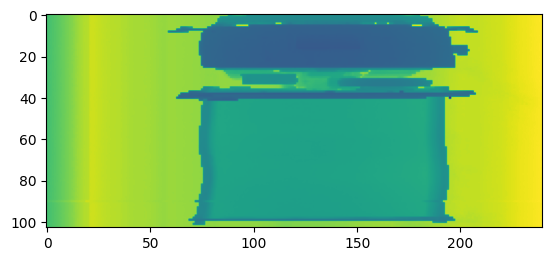

In [8]:
show_image_pil('/content/drive/MyDrive/data_truck1500/images/val/4272_lidar_heights_20240429T111646.189973.png')

**Вычисление косинуса угла, под которым происходит сканирование(раскодировка информации об угле сканирование из угла)**

In [9]:
def right_cos(x):
  x = abs(x - 120)
  zn = (x * 0.5 / 120)
  return (1 - zn**2) ** 0.5

**выпрямление картинки - перевод значения пикслей расстояния в значения высот**

In [10]:
def right_picture(image_data):
  for x in range(image.width):
    for y in range(image.height):
      image_data[x, y] = round(right_cos(x) * image_data[x, y])

**Получаем последнюю полоску по оси оy лидарного сканирования(необходимо чтобы получить чистую полоску по оси оx)**

In [11]:
def get_right_array(ref):
  image = Image.open(ref)
  image_data = image.load()
  arr = []
  for x in range(image.width):
    arr.append(int(right_cos(x) * image_data[x, image.height - 1]))
  return arr

Получаем чистую полоску на которую можно заменять(аналог земли)

In [12]:
right_arr = get_right_array('/content/drive/MyDrive/data_truck1500/images/val/4272_lidar_heights_20240429T111646.189973.png')

In [13]:
right_arr

[5202,
 5258,
 5310,
 5370,
 5432,
 5480,
 5533,
 5593,
 5662,
 5718,
 5781,
 5847,
 5913,
 5983,
 6079,
 6137,
 6201,
 6258,
 6321,
 6342,
 6393,
 6556,
 6573,
 6580,
 6566,
 6557,
 6554,
 6535,
 6541,
 6539,
 6539,
 6535,
 6540,
 6554,
 6557,
 6560,
 6542,
 6531,
 6536,
 6524,
 6517,
 6520,
 6523,
 6528,
 6541,
 6550,
 6560,
 6554,
 6559,
 6565,
 6557,
 6554,
 6552,
 6540,
 6526,
 6525,
 6524,
 6523,
 6548,
 6582,
 6597,
 6595,
 6604,
 6592,
 6603,
 6606,
 6605,
 6605,
 6603,
 6606,
 6612,
 6609,
 6610,
 6613,
 6610,
 6611,
 6608,
 6591,
 6596,
 6614,
 6622,
 6623,
 6629,
 6647,
 6669,
 6680,
 6680,
 6690,
 6692,
 6696,
 6699,
 6694,
 6697,
 6694,
 6695,
 6692,
 6686,
 6692,
 6693,
 6697,
 6699,
 6691,
 6698,
 6679,
 6678,
 6676,
 6673,
 6661,
 6660,
 6645,
 6635,
 6619,
 6601,
 6584,
 6578,
 6564,
 6547,
 6565,
 6580,
 6593,
 6594,
 6593,
 6595,
 6593,
 6596,
 6594,
 6600,
 6608,
 6607,
 6606,
 6603,
 6602,
 6602,
 6599,
 6617,
 6619,
 6620,
 6617,
 6624,
 6628,
 6632,
 6628,
 6635,

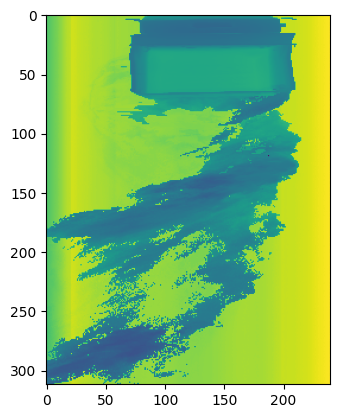

In [14]:
show_image_pil('/content/drive/MyDrive/data_truck1500/images/val/4003_lidar_heights_20240426T093828.898826.png')

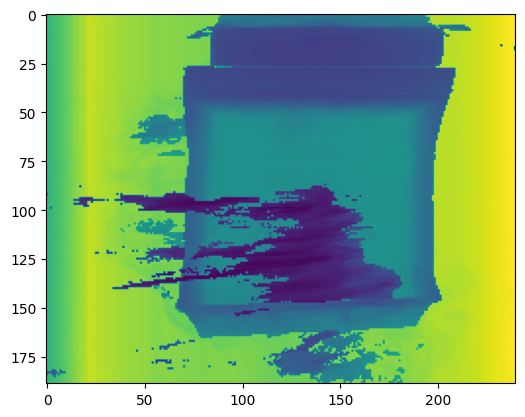

In [15]:
show_image_pil('/content/drive/MyDrive/data_truck1500/images/train/4367_lidar_heights_20240430T095859.225345.png')

Загрузим предобученную модель(запомнили веса после обучения)

In [16]:
model = YOLO('/content/drive/MyDrive/best_weight/last.pt')

Посмотрим на работу нейросетевого детектора

In [17]:
result_val = model.predict('/content/drive/MyDrive/data_truck1500/images/val/2489_lidar_heights_20240403T072804.997786.png')[0]


image 1/1 /content/drive/MyDrive/data_truck1500/images/val/2489_lidar_heights_20240403T072804.997786.png: 416x640 3 dusts, 1091.7ms
Speed: 20.4ms preprocess, 1091.7ms inference, 7.5ms postprocess per image at shape (1, 3, 416, 640)


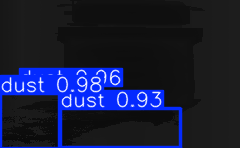

In [18]:
Image.fromarray(result_val.plot()[:,:,::-1])

In [19]:
cords_arr = []
for box in result_val.boxes:
  if len(result_val.boxes) != 0:
    cords = list(map(int,box.xyxy[0]))
    cords_arr.append(cords)
    print("Coordinates:", cords)

Coordinates: [0, 93, 59, 148]
Coordinates: [19, 86, 40, 92]
Coordinates: [60, 108, 180, 147]


In [20]:
image = cv2.imread('/content/drive/MyDrive/2489_lidar_heights_20240403T072804.997786.jpg')

In [21]:
# rectangles = [((0, 93), (59, 148)),  # Прямоугольник 1
#               ((19, 86), (40, 92)),  # Прямоугольник 2
#               ((60, 108), (180, 147))]  # Прямоугольник 3
rectangles = [((60, 108),(180, 147))]

In [24]:
for rect in rectangles:
    cv2.rectangle(image, rect[0], rect[1], (0, 0, 255), 2)  # Синий цвет в BGR

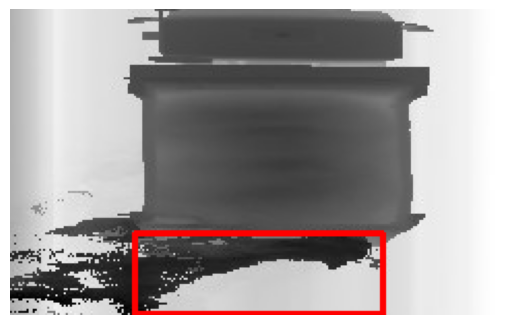

In [25]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Отключить оси
plt.show()

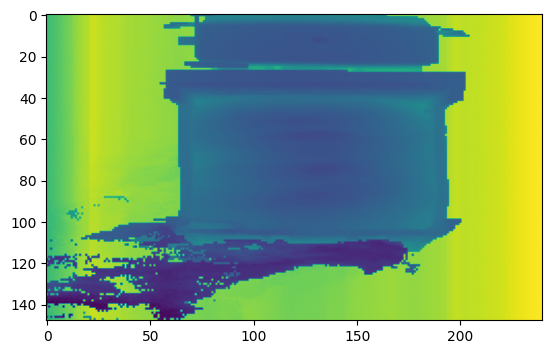

In [24]:
show_image_pil('/content/drive/MyDrive/data_truck1500/images/val/2489_lidar_heights_20240403T072804.997786.png')

In [25]:
result = model.predict('/content/drive/MyDrive/data_truck1500/images/val/3763_lidar_heights_20240424T121507.095375.png')[0]


image 1/1 /content/drive/MyDrive/data_truck1500/images/val/3763_lidar_heights_20240424T121507.095375.png: 544x640 5 dusts, 1266.5ms
Speed: 3.1ms preprocess, 1266.5ms inference, 0.4ms postprocess per image at shape (1, 3, 544, 640)


In [26]:
len(result.boxes)

5

array([[[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       [[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       [[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       ...,

       [[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       [[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       [[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]]], dtype=uint8)
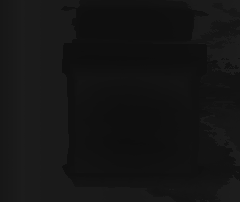

In [27]:
result.orig_img

In [28]:
cords_arr = []
for box in result.boxes:
  if len(result.boxes) != 0:
    cords = list(map(int,box.xyxy[0]))
    cords_arr.append(cords)
    print("Coordinates:", cords)

Coordinates: [199, 56, 240, 121]
Coordinates: [209, 3, 239, 50]
Coordinates: [198, 122, 239, 184]
Coordinates: [145, 186, 222, 201]
Coordinates: [196, 30, 207, 42]


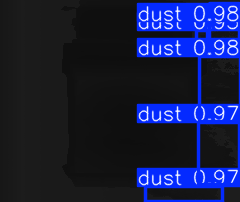

In [29]:
Image.fromarray(result.plot()[:,:,::-1])

In [30]:
cords_arr

[[199, 56, 240, 121],
 [209, 3, 239, 50],
 [198, 122, 239, 184],
 [145, 186, 222, 201],
 [196, 30, 207, 42]]

**создаем маску по ограничивающему прямоугольнику и изображению, исспользуя метод Оцу**

In [20]:
def made_mask(x1,y1,x2,y2, image_path):
  image = cv2.imread(image_path)
  top_left = (x1, y1)
  bottom_right = (x2, y2)
  roi = image[y1:y2, x1:x2]
  gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
  _, binary_mask = cv2.threshold(gray_roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  cv2.imwrite('mask.png', binary_mask)

In [32]:
made_mask(cords_arr[0][0],cords_arr[0][1],cords_arr[0][2],cords_arr[0][3],image_path)

In [33]:
x1 = cords_arr[0][0]
y1 = cords_arr[0][1]
x2 = cords_arr[0][2]
y2 = cords_arr[0][3]

Простая фильтрация пыли - замена на константу

In [34]:
image_path = image_path
mask_path = '/content/mask.png'

image = Image.open(image_path)
mask = Image.open(mask_path).convert('L')
offset_x = x1
offset_y = y1
image_data = image.load()
mask_data = mask.load()
arr = []
for y in range(mask.height):
    for x in range(mask.width):
        if mask_data[x, y] < 10 and x + offset_x < image.width and y + offset_y < image.height and 0 < x + offset_x and 0 < y + offset_y:
            # if is_first[min(x + offset_x, image.width - 1)][min(y + offset_y, image.height - 1)]:
              arr.append(image_data[min(x + offset_x, image.width - 1), min(y + offset_y, image.height - 1)])
              image_data[min(x + offset_x, image.width - 1), min(y + offset_y, image.height - 1)] = 6625
              # is_first[min(x + offset_x, image.width - 1)][min(y + offset_y, image.height - 1)] = False
arr = np.array(arr)
image.save(f'mask_image.png')

In [35]:
np.max(arr), np.min(arr), np.average(arr),np.std(arr)

(7166, 4192, 7109.573985680191, 226.36333423191945)

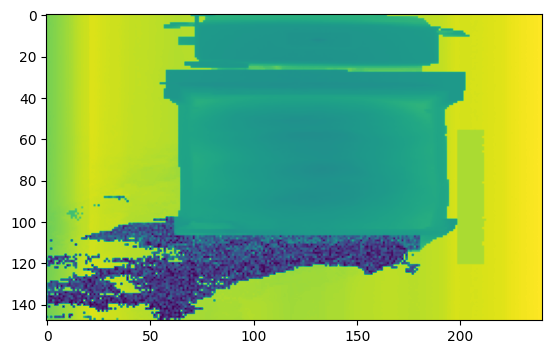

In [36]:
show_image_pil('/content/mask_image.png')

Функция, заменяющая пыль на изображение на массив чистой полоски изображений(земли под лидаром)

In [21]:
def photo_erase_dust(image_path, model, is_mirror):
  global right_arr
  result = model.predict(image_path)[0]
  cords_arr = []
  for box in result.boxes:
    if len(result.boxes) != 0:
      cords = list(map(int,box.xyxy[0]))
      cords_arr.append(cords)
      # print("Coordinates:", cords)
  for i in range(len(cords_arr)):
    # for x1, y1, x2, y2 in cords_arr[i]:
    image = Image.open(image_path)

    x1, y1, x2, y2 = cords_arr[i][0], cords_arr[i][1], cords_arr[i][2], cords_arr[i][3]
    x1 = max(0, x1 - 2)
    y1 = max(0, y1 - 2)
    x2 = min(x2 + 2, image.width - 1)
    y2 = min(y2 + 2, image.height - 1)
    made_mask(x1, y1, x2, y2, image_path)
    mask_path = '/content/mask.png'
    mask = Image.open(mask_path).convert('L')
    offset_x = x1
    offset_y = y1
    image_data = image.load()
    mask_data = mask.load()
    np_arr = []
    for y in range(image.height):
      for x in range(image.width):
        np_arr.append(image_data[x,y])
    data = np_arr
    n = len(data)
    # print("Медиана верхних 3% значений:", median_top_3_percent)
    arr = []
    not_arr = []
    for y in range(mask.height):
        for x in range(mask.width):
            if mask_data[x, y] < 10 and x + offset_x < image.width and y + offset_y < image.height and 0 < x + offset_x and 0 < y + offset_y:
                arr.append(image_data[min(x + offset_x, image.width - 1), min(y + offset_y, image.height - 1)])
                if is_mirror:
                  image_data[min(x + offset_x, image.width - 1), min(y + offset_y, image.height - 1)] = right_arr[240 - (x + offset_x)]
                else:
                  image_data[min(x + offset_x, image.width - 1), min(y + offset_y, image.height - 1)] = right_arr[x + offset_x]
            else:
              not_arr.append(image_data[min(x + offset_x, image.width - 1), min(y + offset_y, image.height - 1)])
    arr = np.array(arr)
    not_arr = np.array(not_arr)
    print(np.std(arr), np.average(arr), '1')
    print(np.std(not_arr), np.average(not_arr), 'not_1')
    if np.std(not_arr) > 25 and np.average(not_arr) > 6000:
      image.save('clear.png')
      print(f'###############################################################save###############################################################')
    show_image_pil('clear.png')

In [22]:
def make_image_copy(image_path, model):
  image = Image.open(image_path)
  image_data = image.load()
  for x in range(image.width):
    for y in range(image.height):
      image_data[x, y] = round(right_cos(x) * image_data[x, y])
  new_path_image = 'clear.png'
  image.save(new_path_image)
  is_mirror = False
  if image_path[-10:][:-4] == 'mirror':
    is_mirror = True
  photo_erase_dust(new_path_image, model, is_mirror)

In [ ]:
show_image_pil('/content/drive/MyDrive/data_truck1500/images/val/3763_lidar_heights_20240424T121507.095375.png')


image 1/1 /content/clear.png: 544x640 5 dusts, 1124.4ms
Speed: 3.6ms preprocess, 1124.4ms inference, 0.4ms postprocess per image at shape (1, 3, 544, 640)
396.9003504059421 4570.088022508038 1
37.215674607439325 6538.404867256637 not_1
###############################################################save###############################################################


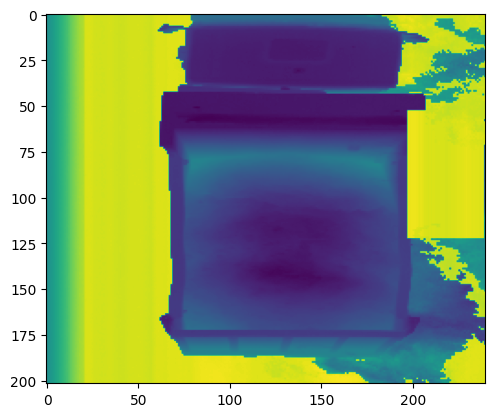

179.44319857194702 5204.940194714882 1
32.29317016256361 6510.9967141292445 not_1
###############################################################save###############################################################


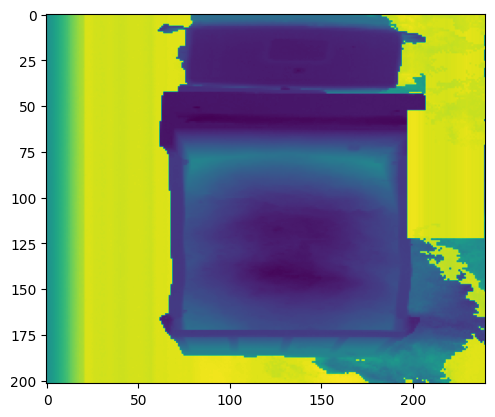

135.1022522958482 5115.839854413103 1
71.66576833335424 6619.625899280575 not_1
###############################################################save###############################################################


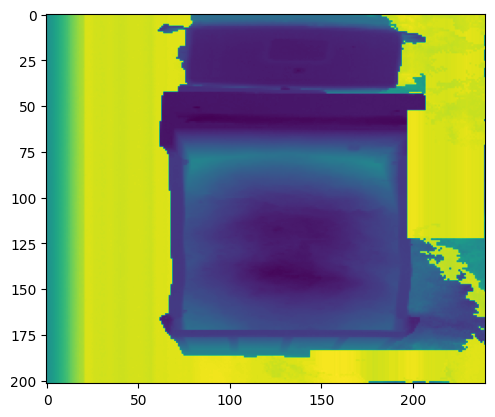

333.4928572102378 4641.293954776188 1
64.28049001547673 6525.481371087929 not_1
###############################################################save###############################################################


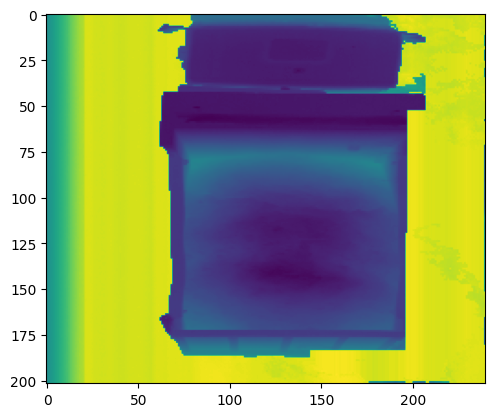

58.685699602786364 5409.523809523809 1
41.64300116887692 6561.038461538462 not_1
###############################################################save###############################################################


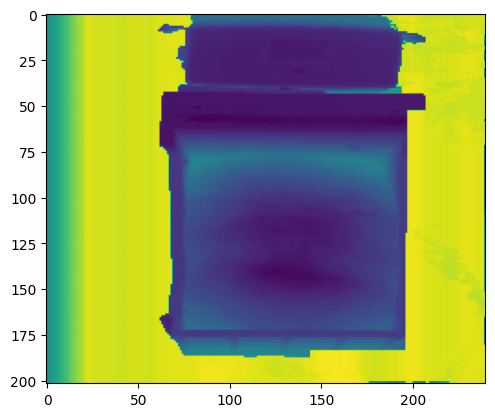

In [31]:
make_image_copy('/content/drive/MyDrive/data_truck1500/images/val/3763_lidar_heights_20240424T121507.095375.png', model)

Получаем изображения в высотах

In [23]:
def get_real_image(ref):
  image = Image.open(ref)
  image_data = image.load()
  for x in range(image.width):
    for y in range(image.height):
      image_data[x, y] = round(image_data[x, y] / right_cos(x))
  pix = np.array(image)
  pix = pix.clip(0, 8000)
  plt.imshow(pix)
  plt.show()

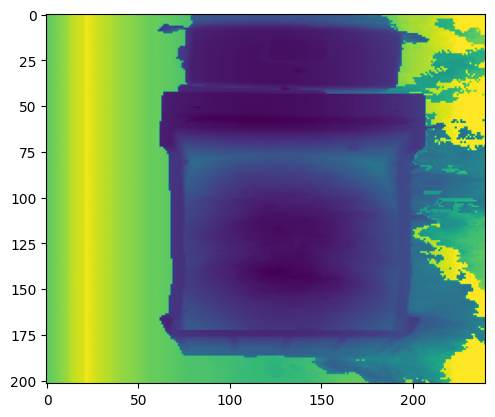

In [34]:
get_real_image('/content/drive/MyDrive/data_truck1500/images/val/3763_lidar_heights_20240424T121507.095375.png')

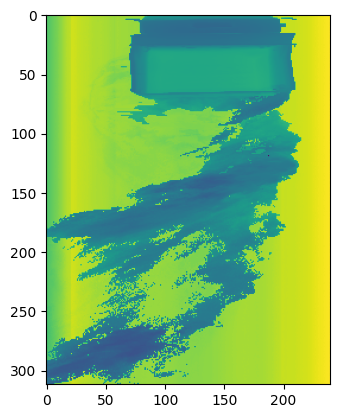

In [ ]:
show_image_pil('/content/drive/MyDrive/data_truck1500/images/val/4003_lidar_heights_20240426T093828.898826.png')

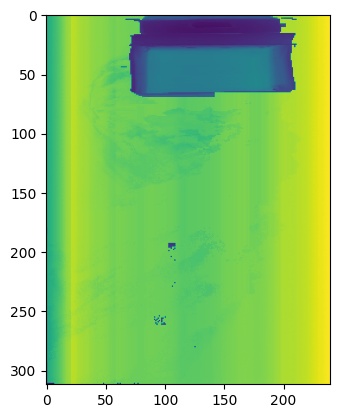

In [ ]:
get_real_image('/content/clear.png')

Получение изображений для статьи

In [33]:
def count_2_rect(image_path, model, is_mirror):
  result = model.predict(image_path)[0]
  cords_arr = []
  for box in result.boxes:
    if len(result.boxes) != 0:
      cords = list(map(int,box.xyxy[0]))
      cords_arr.append(cords)
  count_qlt = []
  for i in range(len(cords_arr)):
    image = Image.open(image_path)
    x1, y1, x2, y2 = cords_arr[i][0], cords_arr[i][1], cords_arr[i][2], cords_arr[i][3]
    x1 = max(0, x1 - 2)
    y1 = max(0, y1 - 2)
    x2 = min(x2 + 2, image.width - 1)
    y2 = min(y2 + 2, image.height - 1)
    made_mask(x1, y1, x2, y2, image_path)
    mask_path = '/content/mask.png'
    mask = Image.open(mask_path).convert('L')
    offset_x = x1
    offset_y = y1
    image_data = image.load()
    mask_data = mask.load()
    np_arr = []
    for y in range(image.height):
      for x in range(image.width):
        np_arr.append(image_data[x,y])
    data = np_arr
    n = len(data)
    # print("Медиана верхних 3% значений:", median_top_3_percent)
    for y in range(mask.height):
        for x in range(mask.width):
            # if mask_data[x, y] < 10 and x + offset_x < image.width and y + offset_y < image.height and 0 < x + offset_x and 0 < y + offset_y:
            #     count_qlt.append(weight_dust_cr(x + offset_x))
            if x + offset_x < image.width and y + offset_y < image.height and 0 < x + offset_x and 0 < y + offset_y:
                count_qlt.append(weight_dust_cr2(x + offset_x))
    # show_image_pil('clear.png')
  image = Image.open(image_path)
  print(sum(count_qlt) / (image.width * image.height))

In [34]:
def weight_dust_cr(x):
  if x < 25:
    return float(1/25 * x)
  if x > 215:
    x = 240 - x
    return float(1 - x * 1/25)
  return float(1)

In [35]:
def weight_dust_cr2(x):
  return float(1)

***Подсчет площади, для классификатора***

In [64]:
def count_1_rect(image_path, model, is_mirror):
  result = model.predict(image_path)[0]
  cords_arr = []
  for box in result.boxes:
    if len(result.boxes) != 0:
      cords = list(map(int,box.xyxy[0]))
      cords_arr.append(cords)
  count_qlt = []
  image = Image.open(image_path)
  is_in = [[True for i in range(image.height)] for j in range(image.width)]
  # for y in range(image.height):
  #     for x in range(image.width):
  #       np_arr.append(image_data[x,y])
  for i in range(len(cords_arr)):
    image = Image.open(image_path)
    x1, y1, x2, y2 = cords_arr[i][0], cords_arr[i][1], cords_arr[i][2], cords_arr[i][3]
    x1 = max(0, x1 - 2)
    y1 = max(0, y1 - 2)
    x2 = min(x2 + 2, image.width - 1)
    y2 = min(y2 + 2, image.height - 1)
    made_mask(x1, y1, x2, y2, image_path)
    mask_path = '/content/mask.png'
    mask = Image.open(mask_path).convert('L')
    offset_x = x1
    offset_y = y1
    image_data = image.load()
    mask_data = mask.load()
    # print("Медиана верхних 3% значений:", median_top_3_percent)
    for y in range(mask.height):
        for x in range(mask.width):
            # if mask_data[x, y] < 10 and x + offset_x < image.width and y + offset_y < image.height and 0 < x + offset_x and 0 < y + offset_y:
            #     count_qlt.append(weight_dust_cr(x + offset_x))
            if is_in[x + offset_x][y + offset_y] and x + offset_x < image.width and y + offset_y < image.height and 0 < x + offset_x and 0 < y + offset_y:
                count_qlt.append(weight_dust_cr2(x + offset_x))
                is_in[x + offset_x][y + offset_y] = False
    # show_image_pil('clear.png')
  image = Image.open(image_path)
  print(sum(count_qlt) / (image.width * image.height))

In [65]:
def count_quality(image_path, model):
  image = Image.open(image_path)
  image_data = image.load()
  show_image_pil(image_path)
  # for x in range(image.width):
  #   for y in range(image.height):
  #     image_data[x, y] = round(right_cos(x) * image_data[x, y])
  new_path_image = 'clear.png'
  image.save(new_path_image)
  is_mirror = False
  if image_path[-10:][:-4] == 'mirror':
    is_mirror = True
  count_1_rect(new_path_image, model, is_mirror)

In [66]:
def count_quality2(image_path, model):
  image = Image.open(image_path)
  image_data = image.load()
  show_image_pil(image_path)
  # for x in range(image.width):
  #   for y in range(image.height):
  #     image_data[x, y] = round(right_cos(x) * image_data[x, y])
  new_path_image = 'clear.png'
  image.save(new_path_image)
  is_mirror = False
  if image_path[-10:][:-4] == 'mirror':
    is_mirror = True
  count_2_rect(new_path_image, model, is_mirror)

*****Оценивали порог по площади, когда изображение можно считать со значительной потерей информации - выбранный порог - 0.27*****

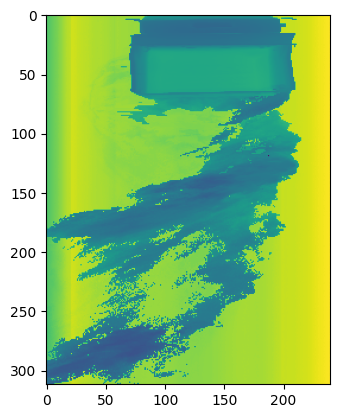


image 1/1 /content/clear.png: 640x512 11 dusts, 4784.1ms
Speed: 3.9ms preprocess, 4784.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)
0.4862980769230769


In [67]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/4003_lidar_heights_20240426T093828.898826.png', model)

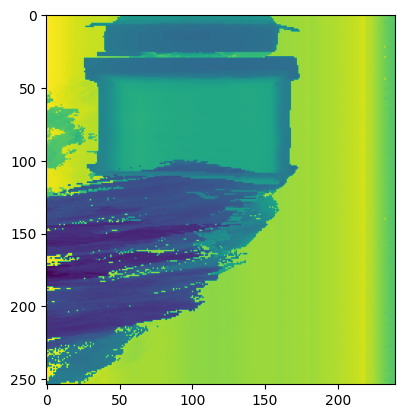


image 1/1 /content/clear.png: 640x608 6 dusts, 1877.6ms
Speed: 4.2ms preprocess, 1877.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 608)
0.3351213910761155


In [68]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/3767_lidar_heights_20240424T133605.663217_mirror.png', model)

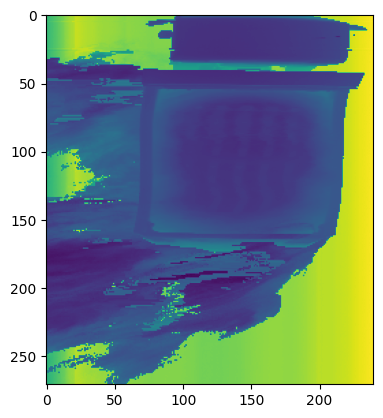


image 1/1 /content/clear.png: 640x576 4 dusts, 1258.7ms
Speed: 3.5ms preprocess, 1258.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 576)
0.4714022140221402


In [69]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/3887_lidar_heights_20240425T120832.570695.png', model)

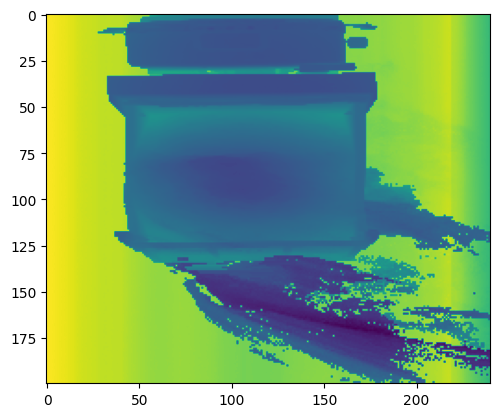


image 1/1 /content/clear.png: 544x640 2 dusts, 1856.9ms
Speed: 8.1ms preprocess, 1856.9ms inference, 0.5ms postprocess per image at shape (1, 3, 544, 640)
0.3238333333333333


In [70]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/2712_lidar_heights_20240408T100929.550023_mirror.png', model)

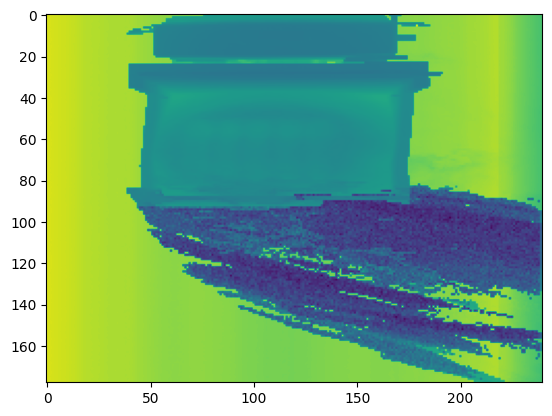


image 1/1 /content/clear.png: 480x640 4 dusts, 1040.0ms
Speed: 3.4ms preprocess, 1040.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
0.3982443820224719


In [71]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/2714_lidar_heights_20240408T105758.615697_-1000_275_mirror.png', model)

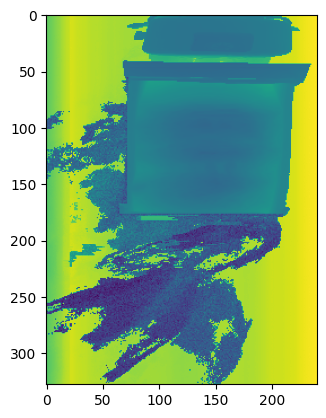


image 1/1 /content/clear.png: 640x480 6 dusts, 2484.1ms
Speed: 7.7ms preprocess, 2484.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)
0.44640497967479675


In [73]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/2734_lidar_heights_20240408T151627.462445_-1000_275.png', model)

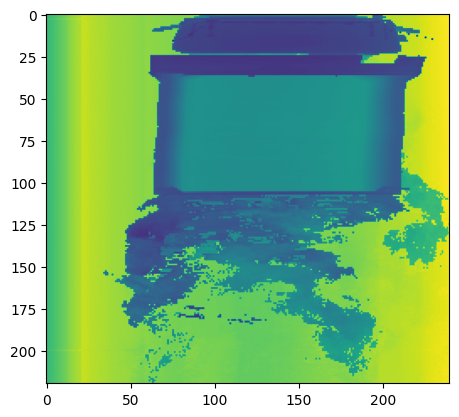


image 1/1 /content/clear.png: 608x640 7 dusts, 3535.8ms
Speed: 5.1ms preprocess, 3535.8ms inference, 0.7ms postprocess per image at shape (1, 3, 608, 640)
0.3900757575757576


In [75]:
count_quality('/content/drive/MyDrive/data_truck1500/images/train/3729_lidar_heights_20240424T102741.195215.png', model)

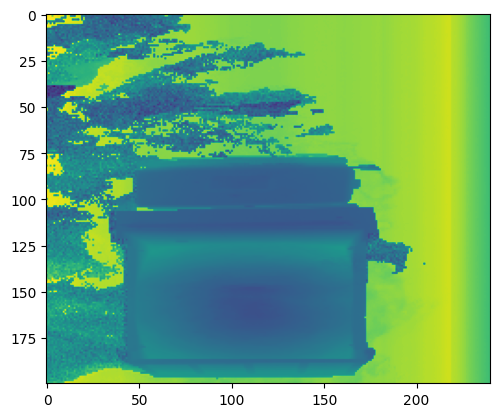


image 1/1 /content/clear.png: 544x640 7 dusts, 2083.5ms
Speed: 5.5ms preprocess, 2083.5ms inference, 0.4ms postprocess per image at shape (1, 3, 544, 640)
0.37895833333333334


In [76]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/3736_lidar_heights_20240424T105302.031306_0_275_mirror.png', model)

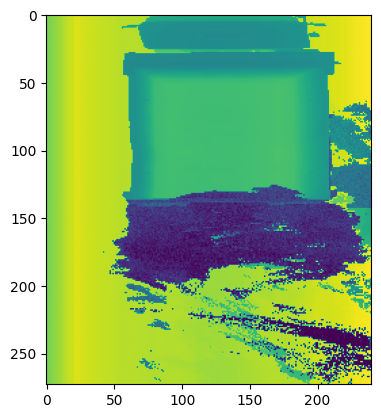


image 1/1 /content/clear.png: 640x576 13 dusts, 1902.5ms
Speed: 20.5ms preprocess, 1902.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 576)
0.4199786324786325


In [77]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/3765_lidar_heights_20240424T131113.763688_-2000_275.png', model)

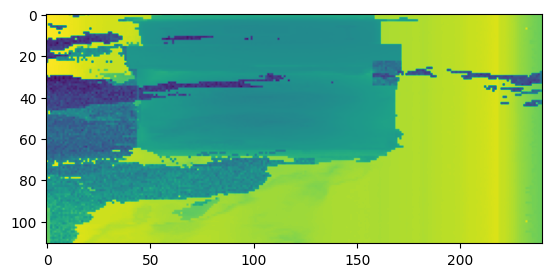


image 1/1 /content/clear.png: 320x640 12 dusts, 725.5ms
Speed: 3.7ms preprocess, 725.5ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)
0.37222222222222223


In [82]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/3775_lidar_heights_20240424T140004.704586_-1000_275_mirror.png', model)

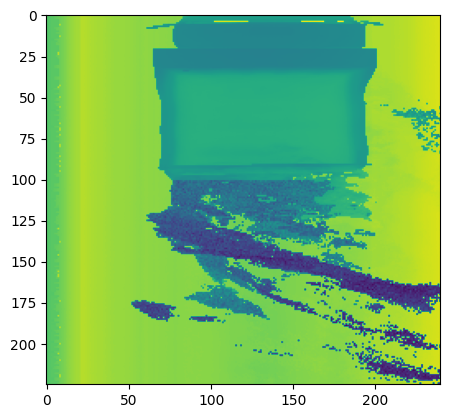


image 1/1 /content/clear.png: 608x640 8 dusts, 4318.4ms
Speed: 6.9ms preprocess, 4318.4ms inference, 0.5ms postprocess per image at shape (1, 3, 608, 640)
0.35518518518518516


In [83]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/3776_lidar_heights_20240424T141026.681968_-1000_275.png', model)

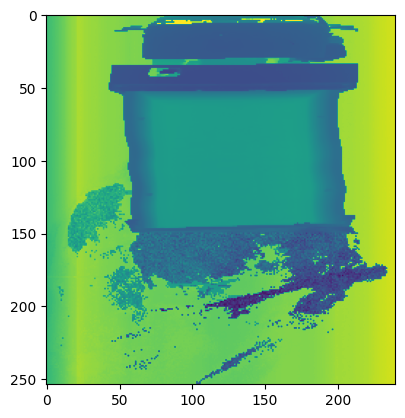


image 1/1 /content/clear.png: 640x608 10 dusts, 2666.7ms
Speed: 4.4ms preprocess, 2666.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 608)
0.3278051181102362


In [84]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/3832_lidar_heights_20240425T084648.850171_0_275.png', model)

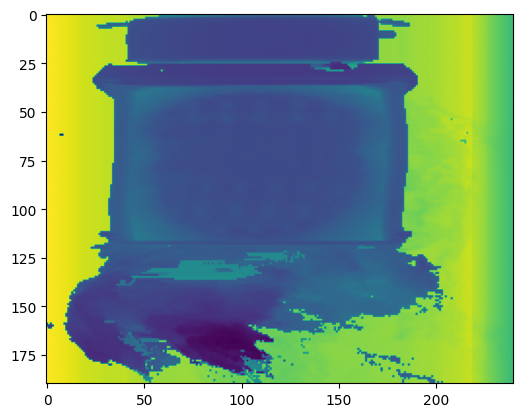


image 1/1 /content/clear.png: 512x640 4 dusts, 1781.0ms
Speed: 7.0ms preprocess, 1781.0ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 640)
0.2848684210526316


In [85]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/3848_lidar_heights_20240425T093331.935981_mirror.png', model)

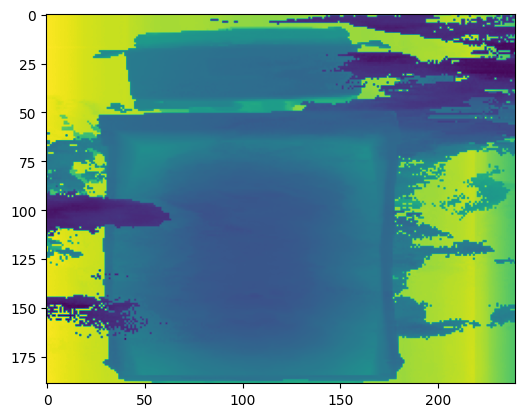


image 1/1 /content/clear.png: 512x640 20 dusts, 2537.0ms
Speed: 7.0ms preprocess, 2537.0ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 640)
0.38522927689594355


In [89]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/3869_lidar_heights_20240425T103006.096739_mirror.png', model)

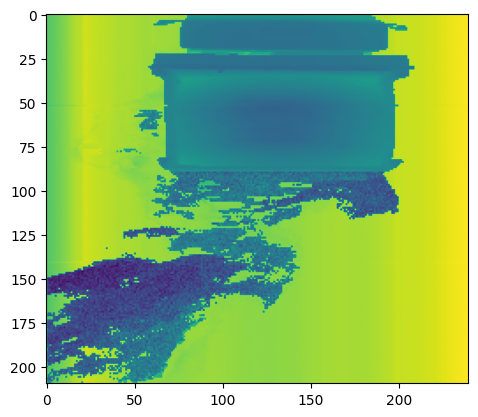


image 1/1 /content/clear.png: 576x640 6 dusts, 2105.0ms
Speed: 4.2ms preprocess, 2105.0ms inference, 0.3ms postprocess per image at shape (1, 3, 576, 640)
0.34557539682539684


In [90]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/3888_lidar_heights_20240425T121530.879606_-1000_275.png', model)

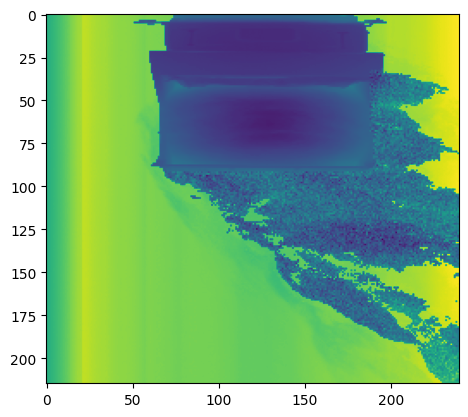


image 1/1 /content/clear.png: 576x640 6 dusts, 2139.2ms
Speed: 4.8ms preprocess, 2139.2ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 640)
0.3449031007751938


In [91]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/3977_lidar_heights_20240426T075009.080616_0_275.png', model)

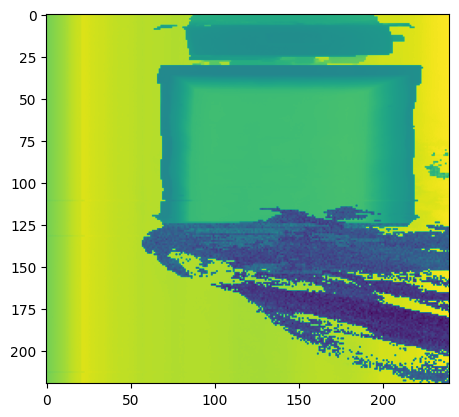


image 1/1 /content/clear.png: 608x640 7 dusts, 2123.9ms
Speed: 4.1ms preprocess, 2123.9ms inference, 0.5ms postprocess per image at shape (1, 3, 608, 640)
0.2846590909090909


In [92]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/3992_lidar_heights_20240426T085118.450170_-1000_275.png', model)

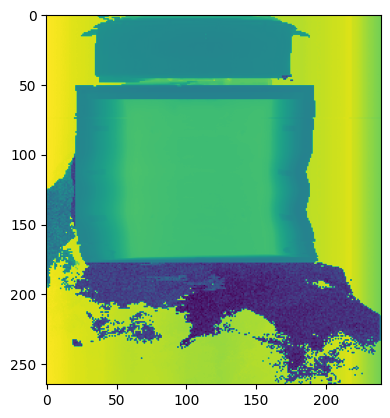


image 1/1 /content/clear.png: 640x608 7 dusts, 2177.3ms
Speed: 8.8ms preprocess, 2177.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 608)
0.2773427672955975


In [93]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/4009_lidar_heights_20240426T094922.337793_-2000_275_mirror.png', model)

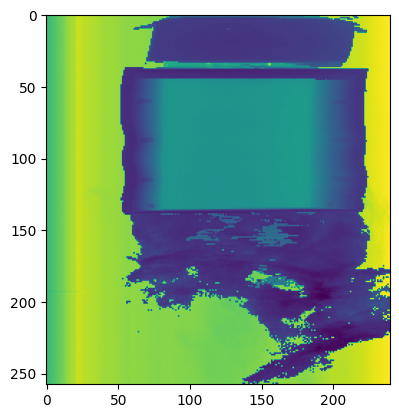


image 1/1 /content/clear.png: 640x608 2 dusts, 1489.0ms
Speed: 8.1ms preprocess, 1489.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 608)
0.28959948320413437


In [96]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/4059_lidar_heights_20240426T121452.937398.png', model)

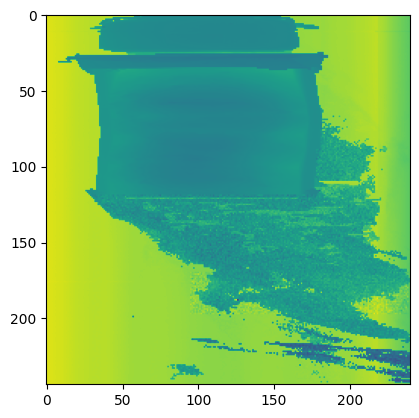


image 1/1 /content/clear.png: 640x640 9 dusts, 3782.7ms
Speed: 8.6ms preprocess, 3782.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
0.37943989071038253


In [97]:
count_quality('/content/drive/MyDrive/data_truck1500/images/val/4360_lidar_heights_20240430T091637.208760_0_275_mirror.png', model)

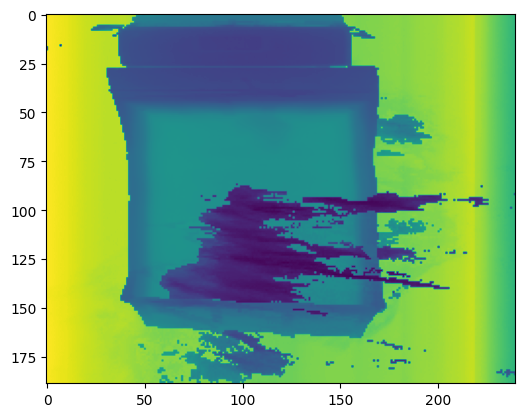


image 1/1 /content/clear.png: 512x640 19 dusts, 1729.7ms
Speed: 6.3ms preprocess, 1729.7ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)
0.2873677248677249


In [98]:
count_quality('/content/drive/MyDrive/data_truck1500/images/train/4367_lidar_heights_20240430T095859.225345_mirror.png', model)